<a href="https://colab.research.google.com/github/StevenHSKim/tensorflow_study/blob/main/pj6_Sequential%EB%A7%90%EA%B3%A0_Functional_API%EB%A1%9C_%EB%A7%8C%EB%93%9C%EB%8A%94_%EA%B0%84%EC%A7%80%EB%82%98%EB%8A%94_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sequential말고 Functional API로 만드는 간지나는 모델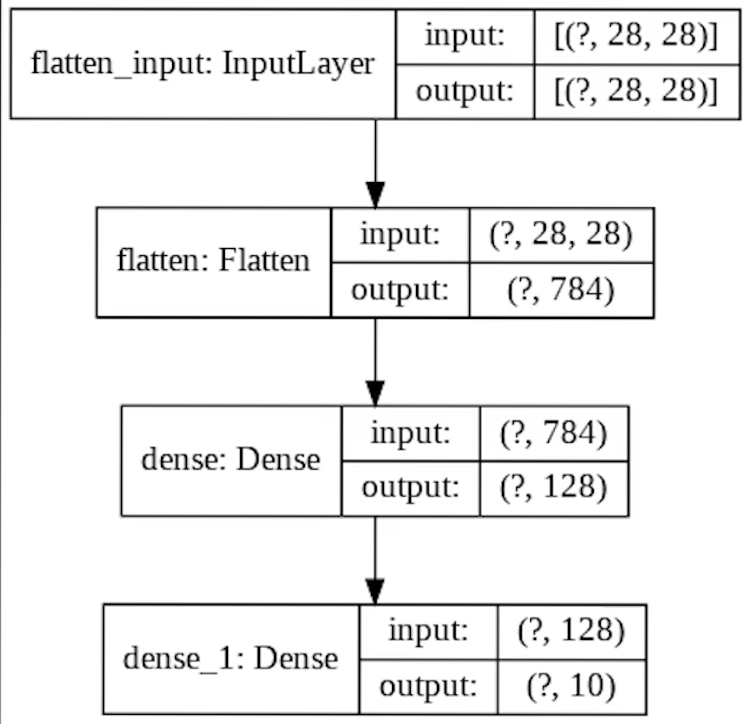
위 그림처럼 한 방향으로 Sequential 하게 흐르는 것이 아니라
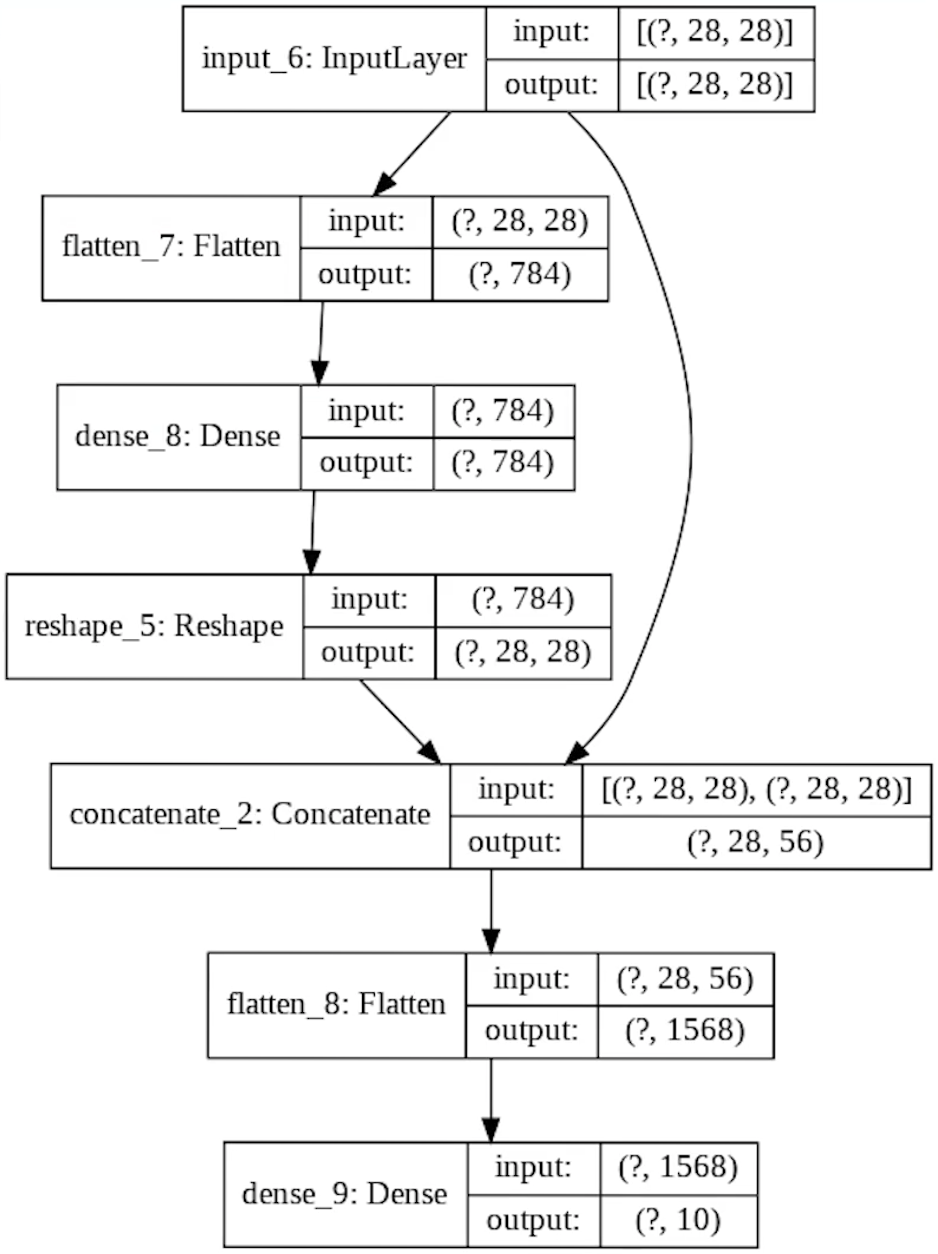

이 그림처럼 흘러가는 경우, Functional API 사용하면 layer을 유연하게 연결 가능하다.

이걸 응용하면 레이어 두개의 결과물을 합친걸 다음 레이어에 전달하거나

더욱 더 복잡한, 혹은 병렬형태의 레이어를 만들어낼 수 있습니다.

약간 간지나게 학습가능합니다.





그리고 Reshape 레이어와 Concatenate 레이어도 함께 알아봅시다.

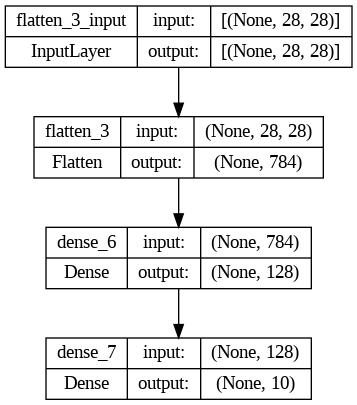

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle', 'boot']
trainX = trainX / 255.0
testX = testX / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['acc'])

#---------------------모델을 출력해주는 함수 plot_model---------------------
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
#----------------------------------------------------------------------

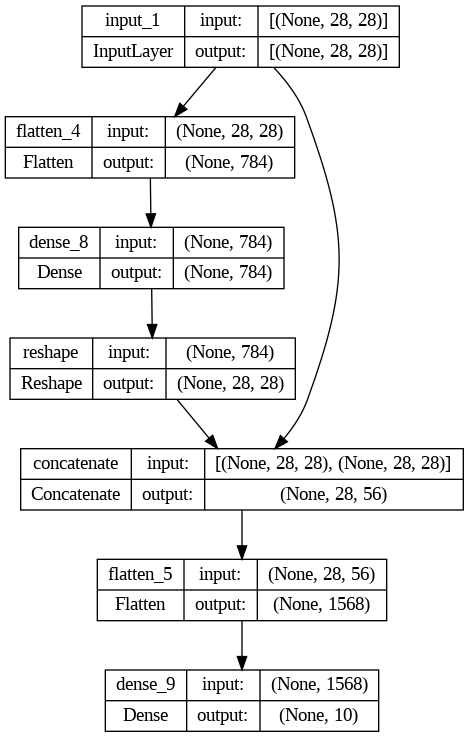

In [5]:
#----------------------Functional API: 이렇게 한 줄씩 layer 만들면 됨----------------------

input1 = tf.keras.layers.Input(shape=[28, 28])
flatten1 = tf.keras.layers.Flatten()(input1) # 이런 식으로 괄호 옆에다가 쓰면 'input1->flatten1'의 의미
dense1 = tf.keras.layers.Dense(28*28, activation='relu')(flatten1)
reshape1 = tf.keras.layers.Reshape((28,28))(dense1) # reshape를 사용하면, flatten 되어 있는 1차원 데이터를 고차원으로 만들어 줄 수 있음
                                                    # reshape 주의점: 이전 layer와 총 node 수가 같아야 함  "28*28 -> (28,28)"

concat1 = tf.keras.layers.Concatenate()([input1, reshape1]) # input1과 reshape1을 합쳐서 concat1에 담기
flatten2 = tf.keras.layers.Flatten()(concat1)
output = tf.keras.layers.Dense(10, activation='softmax')(flatten2) # 연결 항상 잊지 말기

# 마무리: 시작과 끝을 알려줘야 함
model = tf.keras.Model(input1, output)

#-------------------------------------------------------------------------------------

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['acc'])

from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Residual 사용할 때, 이 Functional API 자주 사용한다.
실제로 사용할 때 에러 잦음: shape 꼼꼼히 고려하여 연결하기!